# Slow Feedback Oscillator


This example illustrates loading, and running a kinetic model 
for a delayed -ve feedback oscillator, defined in kkit format. 
The model is one by  Boris N. Kholodenko from 
Eur J Biochem. (2000) 267(6):1583-8 

This model has a high-gain MAPK stage,
whose effects are visible whem one looks at the traces from
successive stages in the plots. The upstream pools have small
early peaks, and the downstream pools have large delayed ones.
The negative feedback step is mediated by a simple binding reaction
of the end-product of oscillation with an upstream activator.

We use the gsl solver here. The model already
defines some plots and sets the runtime to 4000 seconds.
The model does not really play nicely with the GSSA solver, since it
involves some really tiny amounts of the MAPKKK.

Things to do with the model:

    - Look at model once it is loaded in::

            moose.le( '/model' )
            moose.showfields( '/model/kinetics/MAPK/MAPK' )

    - Behold the amplification properties of the cascade. Could do this
      by blocking the feedback step and giving a small pulse input.
    - Suggest which parameters you would alter to change the period of 
      the oscillator:
        - Concs of various molecules, for example::
           
            ras_MAPKKKK = moose.element( '/model/kinetics/MAPK/Ras_dash_MKKKK' )
            moose.showfields( ras_MAPKKKK )
            ras_MAPKKKK.concInit = 1e-5
            
        - Feedback reaction rates
        - Rates of all the enzymes::

            for i in moose.wildcardFind( '/##[ISA=EnzBase]'):
                    i.kcat *= 10.0

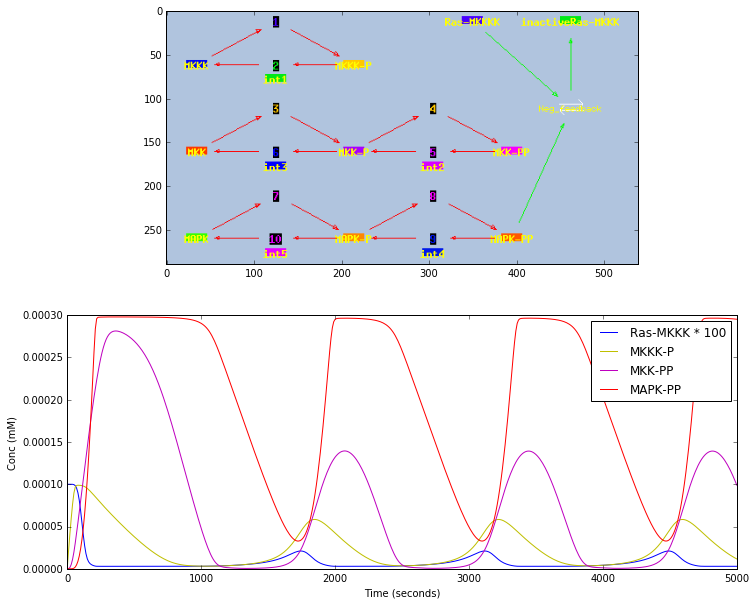

In [6]:
#########################################################################
## This program is part of 'MOOSE', the
## Messaging Object Oriented Simulation Environment.
##           Copyright (C) 2014 Upinder S. Bhalla. and NCBS
## It is made available under the terms of the
## GNU Lesser General Public License version 2.1
## See the file COPYING.LIB for the full notice.
#########################################################################

import moose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pylab
import numpy
import sys

def main():

    solver = "gsl"
    mfile = './Kholodenko.g'
    runtime = 5000.0
    if ( len( sys.argv ) >= 2 ):
        solver = sys.argv[1]
    modelId = moose.loadModel( mfile, 'model', solver )
    dt = moose.element( '/clock' ).tickDt[18]
    moose.reinit()
    moose.start( runtime ) 

    # Display all plots.
    img = mpimg.imread( 'Kholodenko_tut.png' )
    fig = plt.figure( figsize=( 12, 10 ) )
    png = fig.add_subplot( 211 )
    imgplot = plt.imshow( img )
    ax = fig.add_subplot( 212 )
    x = moose.wildcardFind( '/model/#graphs/conc#/#' )
    t = numpy.arange( 0, x[0].vector.size, 1 ) * dt
    ax.plot( t, x[0].vector * 100, 'b-', label='Ras-MKKK * 100' )
    ax.plot( t, x[1].vector, 'y-', label='MKKK-P' )
    ax.plot( t, x[2].vector, 'm-', label='MKK-PP' )
    ax.plot( t, x[3].vector, 'r-', label='MAPK-PP' )
    plt.ylabel( 'Conc (mM)' )
    plt.xlabel( 'Time (seconds)' )
    pylab.legend()
    pylab.show()

# Run the 'main' if this script is executed standalone.
if __name__ == '__main__':
	main()

In [7]:
moose.le('/model')
moose.showfields('/model/kinetics/MAPK/MAPK')

Elements under /model[0]
/model[0]/kinetics
/model[0]/graphs
/model[0]/moregraphs
/model[0]/geometry
/model[0]/groups
/model[0]/info

[ /model[0]/kinetics[0]/MAPK[0]/MAPK[0] ]
className        = Pool
conc             = 5.55392308358e-07
concInit         = 0.0003
diffConst        = 0.0
dt               = 0.005
fieldIndex       = 0
idValue          = 487
index            = 0
isBuffered       = False
motorConst       = 0.0
n                = 0.000557441844824
nInit            = 0.301107075
name             = MAPK
numData          = 1
numField         = 1
path             = /model[0]/kinetics[0]/MAPK[0]/MAPK[0]
speciesId        = 0
tick             = 13
volume           = 1.66666666667e-21
